# Initializations

In [1]:
import numpy as np

In [2]:
import pandas as pd

import sys, os, time
import glob

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
%matplotlib inline

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2

# widgets and interaction
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

import warnings
warnings.filterwarnings('ignore')

import gzip
import pickle

In [5]:
path = "C:/Users/bramv/OneDrive - Square Four/Documenten/Leiden/23-24/urban computing/urbanization-patterns-master/urbanization-patterns-master/"

In [6]:
# %%px --local

import sys
sys.path.append(path + "cityanalysis")
from cityanalysis import City
from cityanalysis import fractal_dimension


In [9]:
# %%px --local 

from skimage.transform import resize
from skimage.io import imread, imsave

def read_img(f, imgSize=None, scale=False, thresh=0):
    img = imread(f)
    img[img < thresh] = 0
    if imgSize is not None:
        img = resize(img, (imgSize, imgSize), preserve_range=True)
    if scale:
        img = (img - img.min()) / float((img.max() - img.min()))
    return img

# Show stats on one example

First example: Paris, a radial, landlocked city with some lakes around.

In [6]:
# SAR is built-up area
# POP is population density
# NLI is night light intensity
# BND is boundary
# WTR is water

myfile_SAR = path + 'data/world-cities/Paris/SAR_Paris.tif'
myfile_POP = path + 'data/world-cities/Paris/POP_Paris.tif'
myfile_NLI = path + 'data/world-cities/Paris/NLI_Paris.tif'
myfile_BND = path + 'data/world-cities/Paris/BND_Paris.tif'
# myfile_WTR = '/home/data/world-cities/spatial-maps/raw/WTR_united-states_california_san-francisco_medium_930370_37.7554_-122.4433.tif'
cityname = "Paris"

In [7]:
myfile_SAR = path + 'data/world-cities/Helsinki/SAR_Helsinki.tif'
myfile_POP = path + 'data/world-cities/Helsinki/POP_Helsinki.tif'
myfile_NLI = path + 'data/world-cities/Helsinki/NLI_Helsinki.tif'
myfile_BND = path + 'data/world-cities/Helsinki/BND_Helsinki.tif'
# myfile_WTR = '/home/data/world-cities/spatial-maps/raw/WTR_united-states_california_san-francisco_medium_930370_37.7554_-122.4433.tif'
cityname = "Helsinki"

In [18]:
myfile_SAR = path + 'data/world-cities/Bucharest/SAR_Bucharest.tif'
myfile_POP = path + 'data/world-cities/Bucharest/POP_Bucharest.tif'
myfile_NLI = path + 'data/world-cities/Bucharest/NLI_Bucharest.tif'
myfile_BND = path + 'data/world-cities/Bucharest/BND_Bucharest.tif'
# myfile_WTR = '/home/data/world-cities/spatial-maps/raw/WTR_united-states_california_san-francisco_medium_930370_37.7554_-122.4433.tif'
cityname = "Bucharest"

In [ ]:
myfile_SAR = '/home/data/world-cities/spatial-maps/raw/SAR_france_ledefrance_paris_large_2483601_48.8566_2.3423.tif'
myfile_POP = '/home/data/world-cities/spatial-maps/raw/POP_france_ledefrance_paris_large_2483601_48.8566_2.3423.tif'
myfile_NLI = '/home/data/world-cities/spatial-maps/raw/NLI_france_ledefrance_paris_large_2483601_48.8566_2.3423.tif'
myfile_BND = '/home/data/world-cities/spatial-maps/raw/BND_france_ledefrance_paris_large_2483601_48.8566_2.3423.tif'
myfile_WTR = '/home/data/world-cities/spatial-maps/raw/WTR_france_ledefrance_paris_large_2483601_48.8566_2.3423.tif'
cityname = "Paris"

In [10]:
img_list = []  # Use a list to store the images

imgSize = 240  # Set the common size for the images

for f in [myfile_SAR, myfile_POP, myfile_NLI]:
    img_list.append(read_img(f, imgSize=imgSize))

img = np.concatenate([a[..., np.newaxis] for a in img_list], axis=2)



In [11]:
bounds = read_img(myfile_BND, imgSize=imgSize, scale=True)
mycity = City(img, name=cityname, bounds=bounds, 
              sources=["built", "pop", "lum"])


In [12]:
# check crs of all images
import rasterio
for f in [myfile_SAR, myfile_POP, myfile_NLI]:
    with rasterio.open(f) as src:
        print(src.crs)

EPSG:4326
EPSG:4326
EPSG:4326


In [13]:
# check crs of bounds
with rasterio.open(myfile_BND) as src:
    print(src.crs)

EPSG:4326


Text(0.5, 0.98, 'Helsinki')

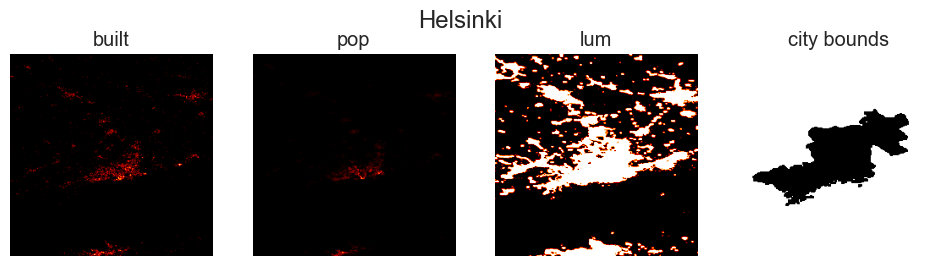

In [14]:
sns.set_context("notebook", font_scale=1.2)

fig, ax = plt.subplots(1,len(mycity.sources)+1,figsize=(12,3))
for i,s in enumerate(mycity.sources):
    ax[i].imshow(mycity.M[...,i], cmap=cm.gist_heat); 
    ax[i].axis("off"); ax[i].set_title(s)

ax[len(mycity.sources)].imshow(mycity.bounds, cmap=cm.Greys); 
ax[len(mycity.sources)].axis("off"); 
ax[len(mycity.sources)].set_title("city bounds")

fig.suptitle(mycity.name)

0
1
2


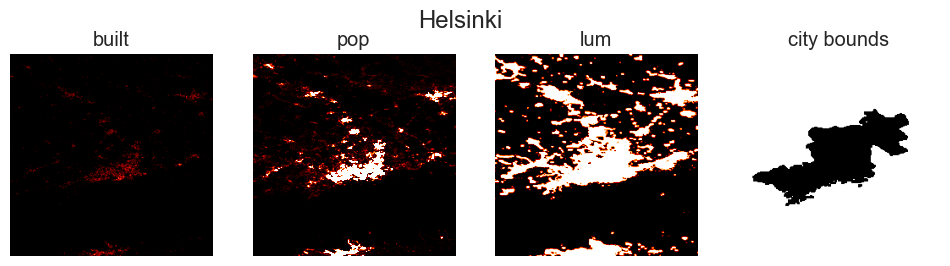

In [110]:
import matplotlib.cm as cm


brightness_factor_first_two = 0.9
brightness_factor_last = 1.0  
fig, ax = plt.subplots(1, len(mycity.sources) + 1, figsize=(12, 3))

for i, s in enumerate(mycity.sources):
    print (i)
    if mycity.sources[i] == 'lum':
        ax[i].imshow(mycity.M[...,i], cmap=cm.gist_heat); 
        ax[i].axis("off"); ax[i].set_title(s)
    else:
        ax[i].imshow(mycity.M[..., i] * brightness_factor_first_two, cmap=cm.gist_heat, vmin=0, vmax=255)
        ax[i].axis("off")
        ax[i].set_title(s)

ax[len(mycity.sources)].imshow(mycity.bounds, cmap=cm.Greys)
ax[len(mycity.sources)].axis("off")
ax[len(mycity.sources)].set_title("city bounds")

fig.suptitle(mycity.name)

plt.show()

#### Fraction of occupied area

In [15]:
mycity.compute_average(within_bounds=True)
mycity.avg_areas_bnds

{'built': 8.974203681096368,
 'pop': 169.1703168426904,
 'lum': 0.5780313476199962}

In [16]:
mycity.compute_average(within_bounds=False)
mycity.avg_areas

{'built': 2.6522924198614315,
 'pop': 41.37631944444445,
 'lum': 0.23299683196484836}

In [17]:
mycity.sum_areas

{'built': 152772.04338401844, 'pop': 2383276.0, 'lum': 13420.617521175265}

In [ ]:
dataroot = "/home/data/world-cities/"

with gzip.open(dataroot + "spatial-maps/stats_cities_over10kpop.pickle.gz", "r") as f:
    cities = pickle.load(f)

In [40]:
import pickle


# Define the file path
stats_file_path = "C:/Users/bramv/OneDrive - Square Four/Documenten/Leiden/23-24/urban computing/urbanization-patterns-master/urbanization-patterns-master/pysatml/home/data/world-cities/spatial-maps/Helsinki.pickle.gz"
mycity.analyze(step=1.34)
mycity.analyze(step=1.34, within_bounds=True)

# Create a dictionary to store the statistics
statistics_dict = {
    "profiles": mycity.profiles,
    "profiles_bnds": mycity.profiles_bnds,
    "frac_dim": mycity.fractal_dim,
    "frac_dim_bnds": mycity.fractal_dim,
    "avg_area": mycity.avg_areas,
    "sum_area": mycity.sum_areas,
    "avg_area_bnds": mycity.avg_areas_bnds,
    "sum_area_bnds": mycity.sum_areas_bnds,
    "area_dis": mycity.areas_distr,
    "area_dis_bnds": mycity.areas_distr,
}

# Save the dictionary to a file using pickle
with open(stats_file_path, 'wb') as file:
    pickle.dump(statistics_dict, file)

print(f"Statistics saved to {stats_file_path}")

Statistics saved to C:/Users/bramv/OneDrive - Square Four/Documenten/Leiden/23-24/urban computing/urbanization-patterns-master/urbanization-patterns-master/pysatml/home/data/world-cities/spatial-maps/Helsinki.pickle.gz


# Some plots

#### Distribution of patch areas

In [19]:
print (mycity.regions['built'])

[(2629, 5), (1060, 4), (1422, 4), (2875, 4), (202, 3), (604, 3), (607, 3), (840, 3), (880, 3), (896, 3), (969, 3), (995, 3), (1075, 3), (2528, 3), (2536, 3), (2595, 3), (2642, 3), (2746, 3), (3071, 3), (3576, 3), (4129, 3), (3, 2), (15, 2), (18, 2), (33, 2), (46, 2), (51, 2), (61, 2), (85, 2), (130, 2), (136, 2), (139, 2), (170, 2), (266, 2), (267, 2), (272, 2), (284, 2), (306, 2), (315, 2), (347, 2), (349, 2), (362, 2), (413, 2), (426, 2), (428, 2), (429, 2), (479, 2), (485, 2), (500, 2), (506, 2), (533, 2), (547, 2), (606, 2), (649, 2), (672, 2), (695, 2), (703, 2), (705, 2), (713, 2), (719, 2), (769, 2), (799, 2), (817, 2), (836, 2), (843, 2), (845, 2), (925, 2), (974, 2), (1015, 2), (1016, 2), (1039, 2), (1063, 2), (1102, 2), (1124, 2), (1125, 2), (1128, 2), (1157, 2), (1189, 2), (1190, 2), (1216, 2), (1221, 2), (1238, 2), (1256, 2), (1285, 2), (1328, 2), (1338, 2), (1350, 2), (1356, 2), (1381, 2), (1387, 2), (1426, 2), (1431, 2), (1445, 2), (1468, 2), (1475, 2), (1485, 2), (1501, 

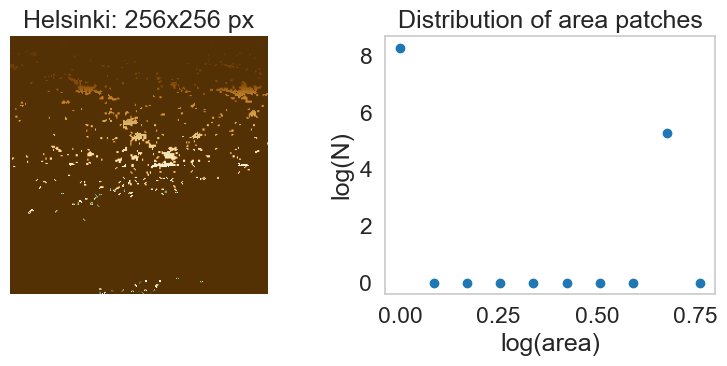

In [20]:
sns.set_context("notebook", font_scale=1.5)

mycity.compute_regions()
areas = mycity.regions['built']
areas_distr, bins = mycity.areas_distr['built'][0], mycity.areas_distr['built'][1]

# plot just top 5 areas
mask1 = mycity.masks_regions['built'].copy()
for a in areas[2000:]:
    mask1[mask1 == a[0]] = 0

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Explicitly set the extent parameter based on the raster dimensions
extent = [0, mycity.M.shape[1], mycity.M.shape[0], 0]

imgplot = ax[0].imshow(mask1, extent=extent)
imgplot.set_cmap('BrBG')
ax[0].set_title("%s: 256x256 px" % mycity.name)
ax[0].axis("off")

# plot distribution of area sizes
ax[1].scatter(np.log(bins), areas_distr, marker="o")
ax[1].set_title("Distribution of area patches")
ax[1].set_ylabel("log(N)")
ax[1].set_xlabel("log(area)")

plt.tight_layout()
plt.show()


#### Fractal dimension

Minkowski-Bouligand dimension (computed):  nan
Haussdorf dimension (theoretical):         1.5849625007211563


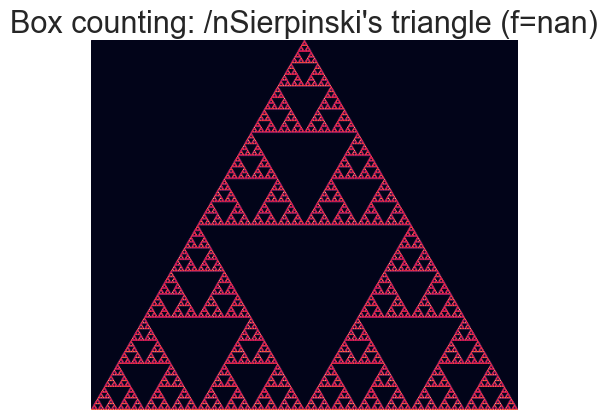

In [21]:
I = read_img("sierpinski.png")
plt.imshow(1-I)
plt.axis("off")
plt.title("Box counting: /nSierpinski's triangle (f=%2.2f)"%fractal_dimension(I)[0], 
          fontsize=22)

print("Minkowski-Bouligand dimension (computed): ", fractal_dimension(I)[0])
print("Haussdorf dimension (theoretical):        ", (np.log(3)/np.log(2)))

In [22]:
frac_dim = mycity.compute_fractal_dim(0, within_bounds=False)
print(mycity.fractal_dim)

_, log_box_sizes, log_box_counts = fractal_dimension(mycity.M[:,:,0])

{'built': 1.670242789578096}


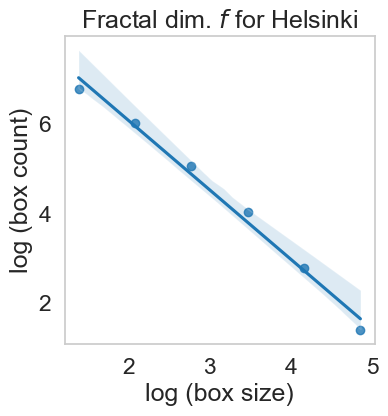

In [23]:
sns.set_context("notebook", font_scale=1.5)
fig = plt.figure(figsize=(4, 4))
ax = sns.regplot(x=log_box_sizes, y=log_box_counts, lowess=False)
plt.xlabel("log (box size)")
plt.ylabel("log (box count)")
plt.title("Fractal dim. $f$ for %s" % mycity.name)

ax.annotate('$f=$%.2f' % frac_dim['built'], xy=(2, 1), xytext=(3, 1.5))
plt.show()


#### Compute distance profiles

90


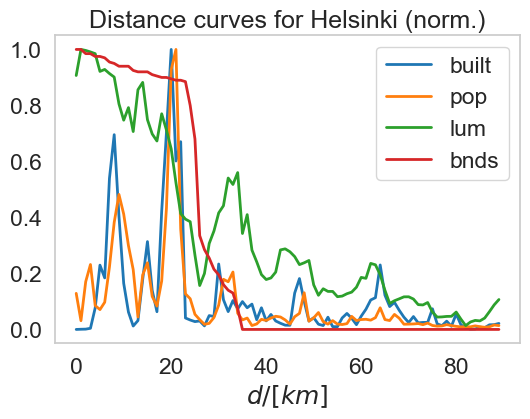

In [24]:
profiles = mycity.compute_profile(method="raysampling", step=1.34, bounds_layer=True)
L = len(list(profiles.values())[0][0])
print(L)
xlabels = np.arange(L)

plt.figure(figsize=(6,4))
for c, p in profiles.items():  # Use items() for Python 3
    plt.plot(xlabels, p[0] / np.nanmax(p[0]), label=c, lw=2)
plt.legend(loc="best")
plt.title("Distance curves for %s (norm.)" % mycity.name)
plt.xlabel("$d / [km]$")
plt.show()


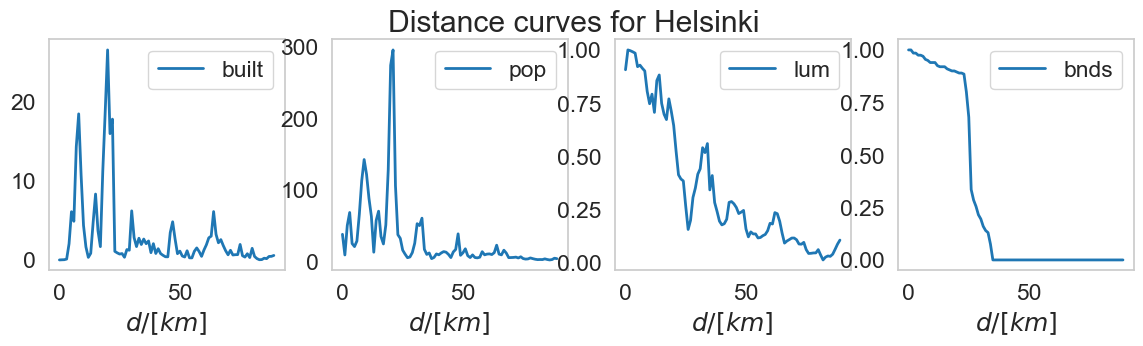

In [25]:
# using radial estimation method 

# profiles = mycity.compute_profile(method="radial", step=1.34)

L = len(list(profiles.values())[0][0])
xlabels = np.arange(L)

fig, ax = plt.subplots(1, 4, figsize=(14, 3))
for (c, p), a in zip(profiles.items(), ax):  # Use items() for Python 3
    a.plot(xlabels, p[0], label=c, lw=2)
    a.set_xlabel("$d / [km]$")
    a.legend(loc="best")
fig.suptitle("Distance curves for %s" % mycity.name)
plt.show()
